# 파이썬으로 배우는 기계학습
# Machine Learning with Python

# 제 11-3 강: Gradient Descent 1 - Batch GD


## 학습목표 
- 배치 경사하강법(Batch GD)으로 학습의 정확도를 이해한다.
- 확률적 경사하강법(Stochastic GD)으로 학습의 효율성을 이해한다.

## 학습 내용
- MNIST 자료셋에 대한 다양한 경사하강법 비교하기
- 배치 경사하강법(Batch GD)의 정확도 이해하기 
- 확률적 경사하강법(Stochastic GD)으로 학습하기

In [10]:
import imp
import joy
imp.reload(joy)
import numpy as np

## 1.1 MNIST 배치 경사하강법 신경망의 구현

우리는 앞 강의에서 MNIST 데이터셋의 분류 문제를 다룰 수 있는 신경망에 대해 공부했습니다. 또한, 신경망이 학습하는 가장 기본적인 (배치) 경사하강법에 대해 배웠습니다. 이번 장에서는 경사 하강법에 대해 복습하고, MNIST 데이터셋을 학습하는 실습을 하도록 하겠습니다.

먼저 경사 하강법이란 현재 위치에서 어떤 함수의 극소점을 찾는 방법을 말합니다. 그렇다면 반대로 극대점을 찾는 방법은 경사 상승법이라고 합니다. 우리가 신경망을 학습 시킬 때에는 신경망의 예측 값과 레이블 간의 오차율을 작게 만드는 것이 목표이기 때문에 오차율의 극소점을 발견하는 경사 하강법을 사용합니다.

다음과 같이 $x^2 + y^2$의 함수 그래프가 있다고 할 때, 그래프가 가장 움푹 파인 곳이 극소점이라는 것을 한 눈에 찾을 수 있을 것입니다.
즉, 기울기가 0인 곳을 극소점/극대점 이라고 부르며 이는 그래프의 미분 값이 0인 곳을 말합니다.

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/GradientDescentMesh.png?raw=true" width="400">

하지만, 2차원 함수보다 차원이 높은 함수일 수록 발견하기 어려울 것 입니다. 신경망에서는 복잡한 함수의 극소점을 어떻게 찾아갈까요?

아래 그림과 같이 여러분이 등산을 한다고 생각해 봅시다. 아니면, 숲이 우거져 앞이 보이지 않는 밀림에 있다고 상상해 봅시다. 여러분은 지도도 나침반도 없는 상황에서 정상에 도달하여야 합니다. 현재 있는 위치도 어디인지 모르고 숲이 우거져 한치 앞도 보이지 않습니다.

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/GradientDescentEx.png?raw=true" width="400">

가장 직관적인 방법으로는 현재 본인이 위치한 곳 보다 조금 더 높아 보이는 곳으로 가는 방법일 것입니다. 그리고 새로운 위치에서 다시 한번 지금 내가 갈 수 있는 가장 높아 보이는 곳으로 한 발 나아갑니다. 이런 작업을 반복하다 보면 결국 정상에 도달해 있지 않을까요?

경사 하강법은 정상에 오르는 방법과 유사하게 오차율을 최소화 하는 극소점을 찾아 내려갑니다. 아래 식을 보며 조금 더 얘기해 봅시다.

\begin{align}
  \Delta w &= -\eta \Delta{J(w)} \\
               &=-\eta \frac{\partial{J(w)}}{\partial{w_j}} 
\end{align}

우선 $\eta$는 학습율을 의미하며, 위의 예제에서는 여러분들의 보폭을 말합니다. 한 발 내딛을 때 얼마나 큰 보폭으로 산을 올라갈지를 결정합니다. <br>또한, 우리가 원하는 것은 오차율의 극대점을 찾는 것의 반대이기 때문에 $\eta\ 앞에 -$기호를 사용하여 극소점을 거꾸로 찾아갑니다.<br>산의 정상에서 내려오는 일이라고 생각하면 됩니다. 뒤에 따라오는 미분 값은 신경망의 가중치에 따른 오차 값의 변화(기울기)가 0이 되는 점을 찾는 방법입니다.

이제 기본적인 경사 하강법에 대한 복습을 마쳤으니 MNIST 데이터셋을 직접 학습시켜보도록 하겠습니다. 아래는 앞에서 배운 비용함수 입니다.

\begin{align}
J(w) = \frac{1}{2} \sum_{i} \big(y^{(i)} - h(z^{(i)})\big)^2 \tag1
\end{align}

하지만, 우리는 6만개의 MNIST 데이터 전체를 이용하여 학습하기 때문에 식(2) 처럼 데이터의 개수를 비용함수에 나누어 줘야 합니다.
여기서는 데이터의 개수를 $m$으로 표기합니다.

\begin{align}
J(w) = \frac{1}{2m} \sum_{i} \big(y^{(i)} - h(z^{(i)})\big)^2  \tag{2} 
\end{align}

\begin{align}
\Delta w &= -\eta \Delta{J(w)} \\
               &=-\eta \frac{\partial{J(w)}}{\partial{w_j}} \tag{3}
\end{align}

최종적으로 신경망의 가중치는 6만개의 모든 데이터를 보고 그 중 가장 오차율을 최소화 하는 방향으로 $\eta$만큼 한 걸음 내딛어 업데이트 합니다.

## 1.1 MNIST 배치 경사하강법 신경망의 구현

우리는 앞 강의에서 MNIST 데이터셋의 분류 문제를 다룰 수 있는 신경망에 대해 공부습니다.  가장 기본적인 (배치) 경사하강법에 대해 알아 보겠습니다. 

In [6]:
#%%writefile code/MnistBGD.py
#%load code/MnistBGD.py

class MnistBGD_LS(object):
    """ Batch Gradient Descent with Learning Schedule
    """
    def __init__(self, n_x, n_h1, n_y, eta = 0.1, epochs = 100, random_seed=1):
        """ 
        """
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        self.eta = eta
        self.epochs = epochs
        np.random.seed(random_seed)
        self.W1 = 2*np.random.random((self.n_h, self.n_x)) - 1  # between -1 and 1
        self.W2 = 2*np.random.random((self.n_y, self.n_h)) - 1  # between -1 and 1
        print('W1.shape={}, W2.shape={}'.format(self.W1.shape, self.W2.shape))
        
    def forpass(self, A0):
        Z1 = np.dot(self.W1, A0)        # hidden layer inputs
        A1 = self.g(Z1)                 # hidden layer outputs/activation func
        Z2 = np.dot(self.W2, A1)        # output layer inputs
        A2 = self.g(Z2)                 # output layer outputs/activation func
        return Z1, A1, Z2, A2

    def fit(self, X, y):
        self.cost_ = []
        self.m_samples = len(y)       
        Y = joy.one_hot_encoding(y, self.n_y)     
        # learning rate is scheduled to decrement by a step of 
        # which the inteveral from self.eta to 0.0001 eqaully 
        # divided by total number of iterations(epochs or 
        # epochs * m_samples)
        eta_scheduled = np.linspace(self.eta, 0.0001, self.epochs)
        
        # for momentum
        #self.v1 = np.zeros_like(self.W1)
        #self.v2 = np.zeros_like(self.W2)
        
        for epoch in range(self.epochs):
            if epoch % 100 == 0:
                print('Training epoch {}/{}.'.format(epoch, self.epochs))

            A0 = np.array(X, ndmin=2).T       
            Y0 = np.array(Y, ndmin=2).T     

            Z1, A1, Z2, A2 = self.forpass(A0)  
            E2 = Y0 - A2                      
            E1 = np.dot(self.W2.T, E2)         

            dZ2 = E2 * self.g_prime(Z2)          
            dZ1 = E1 * self.g_prime(Z1)       
            
            # udpate weight with momentum
            #eta = learning_schedule[epoch]
            #self.v2 = 0.9 * self.v2 + self.eta * np.dot(dZ2, A1.T) / m_samples
            #self.v1 = 0.9 * self.v1 + self.eta * np.dot(dZ1, A0.T) / m_samples
            #self.W2 += self.v2     
            #self.W1 += self.v1 

            # update weights without momentum
            # eta = eta_scheduled[epoch]
            self.W2 +=  self.eta * np.dot(dZ2, A1.T) / self.m_samples    
            self.W1 +=  self.eta * np.dot(dZ1, A0.T) / self.m_samples    
            self.cost_.append(np.sqrt(np.sum(E2 * E2)))
        return self

    def predict(self, X):
        A0 = np.array(X, ndmin=2).T         # A0: inputs
        Z1, A1, Z2, A2 = self.forpass(A0)   # forpass
        return A2                                       

    def g(self, x):                 # activation_function: sigmoid
        x = np.clip(x, -500, 500)   # prevent from overflow, 
        return 1.0/(1.0+np.exp(-x)) # stackoverflow.com/questions/23128401/
                                    # overflow-error-in-neural-networks-implementation
    
    def g_prime(self, x):                    # activation_function: sigmoid derivative
        return self.g(x) * (1 - self.g(x))
    
    def evaluate(self, Xtest, ytest):       # fully vectorized calculation
        m_samples = len(ytest)
        scores = 0        
        A2 = self.predict(Xtest)
        yhat = np.argmax(A2, axis = 0)
        scores += np.sum(yhat == ytest)
        return scores/m_samples * 100
    
    def evaluate_onebyone(self, Xtest, ytest):
        m_samples = len(ytest)
        scores = 0
        for m in range(m_samples):
            A2 = nn.predict(Xtest[m])
            yhat = np.argmax(A2)
            if yhat == ytest[m]:
                scores += 1        
        return scores/m_samples * 100
    

[1 7 9 2 3]
W1.shape=(100, 784), W2.shape=(10, 100)
(30, 784) (30,)
Training epoch 0/1000.
Training epoch 100/1000.
Training epoch 200/1000.
Training epoch 300/1000.
Training epoch 400/1000.
Training epoch 500/1000.
Training epoch 600/1000.
Training epoch 700/1000.
Training epoch 800/1000.
Training epoch 900/1000.
MNIST classification accuracy 100.0%


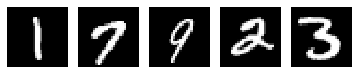

In [9]:
import joy
%matplotlib inline

# read mnist dataset
(X, y), (Xtest, ytest) = joy.load_mnist()     
X = X[:30]
y = y[:30]
selected = np.random.choice(X.shape[0], 200)
Xtest = X[selected]
ytest = y[selected]
joy.show_mnist_grid(Xtest[:5].reshape(-1, 28, 28))
print(ytest[:5])

# set hyperparameters and instantiate the class object
n_x, n_h, n_y = 784, 100, 10          
nn = MnistBGD_LS(n_x, n_h, n_y, eta = 0.2, epochs = 1000)  
print(X.shape, y.shape)
# train the model
nn.fit(X, y)       
accuracy = nn.evaluate(X, y)      
print('MNIST classification accuracy {}%'.format(accuracy))

In [ ]:
#Xtest, ytest = joy.getXy_mnist_csv("mnist_test_10.csv", display = False)
selected = np.random.choice(X.shape[0], 100)
Xtest = X[selected]
ytest = y[selected]
joy.show_mnist_grid(X[:10].reshape(-1, 28, 28))
print(ytest[:10])

accuracy = nn.evaluate(Xtest, ytest)      
print('MNIST classification accuracy {}%'.format(accuracy))
#mnist_trian_100, mnist_test_10.csv accuraccy 70%, eta=0.01, epoch=100
#mnist_trian_100, mnist_test_10.csv accuraccy 60%, eta=0.1, epoch=100
#mnist_trian_100, mnist_test_10.csv accuraccy 80%, eta=0.1, epoch=1000, learning schedule
#mnist_trian_100, mnist_test_10.csv accuraccy 70%, eta=0.1, epoch=2000, learning schedule

In [29]:
selected = np.random.choice(X.shape[0], 100)
Xtest = X[selected]
ytest = y[selected]          

accuracy = nn.evaluate(Xtest, ytest)      
print('MNIST classification accuracy {}%'.format(accuracy))

MNIST classification accuracy 100.0%


In [30]:
# read mnist dataset
(X, y), (Xtest, ytest) = joy.load_mnist()     
# set hyperparameters and instantiate the class object
n_x, n_h, n_y = 784, 100, 10          
nn = MnistBGD_LS(n_x, n_h, n_y, eta = 0.2, epochs = 200)  
# train the model
nn.fit(X[:5000], y[:5000])       
accuracy = nn.evaluate(Xtest[:1000], ytest[:1000])      
print('MNIST classification accuracy {}%'.format(accuracy))

W1.shape=(100, 784), W2.shape=(10, 100)
Training epoch 1/200.
Training epoch 101/200.
MNIST classification accuracy 66.2%


In [31]:
import joy
%matplotlib inline
(X, y), (Xtest, ytest) = joy.load_mnist() 
epoch_list = [i for i in np.arange(100, 1500, 200)]
self_accuracy = []
test_accuracy = []
for i, e in  enumerate(epoch_list):
    nn = MnistBGD_LS(784, 150, 10, eta=0.1, epochs = e)  
    nn.fit(X[:5000], y[:5000])  
    self_accuracy.append(nn.evaluate(X[:5000], y[:5000]))  
    test_accuracy.append(nn.evaluate(Xtest[:1000], ytest[:1000]))

W1.shape=(100, 784), W2.shape=(10, 100)
Training epoch 1/100.
W1.shape=(100, 784), W2.shape=(10, 100)
Training epoch 1/150.
Training epoch 101/150.
W1.shape=(100, 784), W2.shape=(10, 100)
Training epoch 1/200.
Training epoch 101/200.
W1.shape=(100, 784), W2.shape=(10, 100)
Training epoch 1/250.
Training epoch 101/250.
Training epoch 201/250.
W1.shape=(100, 784), W2.shape=(10, 100)
Training epoch 1/300.
Training epoch 101/300.
Training epoch 201/300.
W1.shape=(100, 784), W2.shape=(10, 100)
Training epoch 1/350.
Training epoch 101/350.
Training epoch 201/350.
Training epoch 301/350.
W1.shape=(100, 784), W2.shape=(10, 100)
Training epoch 1/400.
Training epoch 101/400.
Training epoch 201/400.
Training epoch 301/400.
W1.shape=(100, 784), W2.shape=(10, 100)
Training epoch 1/450.
Training epoch 101/450.
Training epoch 201/450.
Training epoch 301/450.
Training epoch 401/450.
W1.shape=(100, 784), W2.shape=(10, 100)
Training epoch 1/500.
Training epoch 101/500.
Training epoch 201/500.
Training e

Training epoch 1101/1650.
Training epoch 1201/1650.
Training epoch 1301/1650.
Training epoch 1401/1650.
Training epoch 1501/1650.
Training epoch 1601/1650.
W1.shape=(100, 784), W2.shape=(10, 100)
Training epoch 1/1700.
Training epoch 101/1700.
Training epoch 201/1700.
Training epoch 301/1700.
Training epoch 401/1700.
Training epoch 501/1700.
Training epoch 601/1700.
Training epoch 701/1700.
Training epoch 801/1700.
Training epoch 901/1700.
Training epoch 1001/1700.
Training epoch 1101/1700.
Training epoch 1201/1700.
Training epoch 1301/1700.
Training epoch 1401/1700.
Training epoch 1501/1700.
Training epoch 1601/1700.
W1.shape=(100, 784), W2.shape=(10, 100)
Training epoch 1/1750.
Training epoch 101/1750.
Training epoch 201/1750.
Training epoch 301/1750.
Training epoch 401/1750.
Training epoch 501/1750.
Training epoch 601/1750.
Training epoch 701/1750.
Training epoch 801/1750.
Training epoch 901/1750.
Training epoch 1001/1750.
Training epoch 1101/1750.
Training epoch 1201/1750.
Training

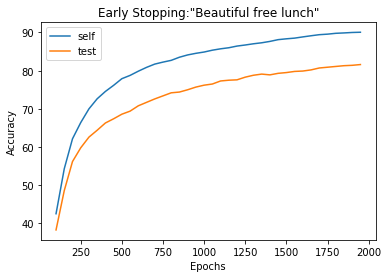

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.plot(epoch_list, self_accuracy, label='self')
plt.plot(epoch_list, test_accuracy, label='test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Early Stopping:"Beautiful free lunch"')
plt.legend(loc='best')
plt.show()

In [35]:
print('last test acc=', test_accuracy[-1])
accuracy = nn.evaluate(Xtest[:200], ytest[:200])      
print('MNIST classification accuracy {}%'.format(accuracy))

last test acc= 81.6
MNIST classification accuracy 85.5%


## 1.2 신속한 테스트 (훈련 자료 자체를 테스트함)

[1 7 9 2 3]
W1.shape=(100, 784), W2.shape=(10, 100)
Training epoch 1/1000.
Training epoch 101/1000.
Training epoch 201/1000.
Training epoch 301/1000.
Training epoch 401/1000.
Training epoch 501/1000.
Training epoch 601/1000.
Training epoch 701/1000.
Training epoch 801/1000.
Training epoch 901/1000.
MNIST classification accuracy 100.0%


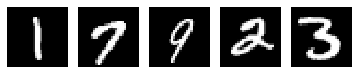

In [36]:
import joy
%matplotlib inline

# read mnist dataset
(X, y), (Xtest, ytest) = joy.load_mnist()     
#X, y = joy.read_mnist_csv("mnist_train_100.csv", display = False)

X = X[:30]
y = y[:30]
selected = np.random.choice(X.shape[0], 200)
Xtest = X[selected]
ytest = y[selected]
joy.show_mnist_grid(Xtest[:5].reshape(-1, 28, 28))
print(ytest[:5])

# set hyperparameters and instantiate the class object
n_x, n_h, n_y = 784, 100, 10          
nn = MnistBGD_LS(n_x, n_h, n_y, eta = 0.1, epochs = 1000)  

# train the model
nn.fit(X, y)       
accuracy = nn.evaluate(X, y)      
print('MNIST classification accuracy {}%'.format(accuracy))

In [20]:
# read mnist dataset
(X, y), (Xtest, ytest) = joy.load_mnist()     
# set hyperparameters and instantiate the class object
n_x, n_h, n_y = 784, 100, 10          
nn = MnistBGD_LS(n_x, n_h, n_y, eta = 0.2, epochs = 200)  
# train the model
nn.fit(X[:5000], y[:5000])       
accuracy = nn.evaluate(Xtest[:1000], ytest[:1000])      
print('MNIST classification accuracy {}%'.format(accuracy))

W1.shape=(100, 784), W2.shape=(10, 100)
Training epoch 1/200.
Training epoch 101/200.
MNIST classification accuracy 66.2%


In [22]:
import joy
%matplotlib inline

# read mnist dataset
(X, y), (Xtest, ytest) = joy.load_mnist()     

# set hyperparameters and instantiate the class object
n_x, n_h, n_y = 784, 100, 10          
nn = MnistBGD_LS(n_x, n_h, n_y, eta = 0.1, epochs = 100)  

# train the model
nn.fit(X, y)       
accuracy = nn.evaluate(X, y)      
print('MNIST classification accuracy {}%'.format(accuracy))

W1.shape=(100, 784), W2.shape=(10, 100)
Training epoch 1/100.
MNIST classification accuracy 40.129999999999995%


[8 0 2 2 0 5 3 4 0 1]
MNIST classification accuracy 37.0%


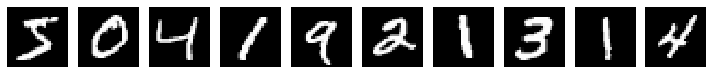

In [23]:
#Xtest, ytest = joy.getXy_mnist_csv("mnist_test_10.csv", display = False)

selected = np.random.choice(X.shape[0], 100)
Xtest = X[selected]
ytest = y[selected]
joy.show_mnist_grid(X[:10].reshape(-1, 28, 28))
print(ytest[:10])

accuracy = nn.evaluate(Xtest, ytest)      
print('MNIST classification accuracy {}%'.format(accuracy))
#mnist_trian_100, mnist_test_10.csv accuraccy 70%, eta=0.01, epoch=100
#mnist_trian_100, mnist_test_10.csv accuraccy 60%, eta=0.1, epoch=100
#mnist_trian_100, mnist_test_10.csv accuraccy 80%, eta=0.1, epoch=1000, learning schedule
#mnist_trian_100, mnist_test_10.csv accuraccy 70%, eta=0.1, epoch=2000, learning schedule

In [9]:
selected = np.random.choice(X.shape[0], 100)
Xtest = X[selected]
ytest = y[selected]          

accuracy = nn.evaluate(Xtest, ytest)      
print('MNIST classification accuracy {}%'.format(accuracy))

MNIST classification accuracy 25.0%


### 1.3 오차(self.cost_)의 시각화 

신경망을 학습시키면서 발생하는 오차(손실)를 MnistMiniBatch객체의 속성 `cost_`에 저장되어 있습니다. 이를 시각화해서 신경망이 어떻게 학습을 하였는지, 손실을 최소화하는 방향을 수렴하였는지 분석할 수 있습니다.  다음 셀의 코드를 실행해 봅시다.  

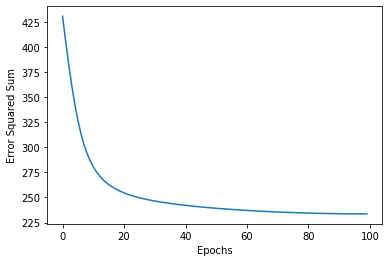

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt 

plt.plot(range(len(nn.cost_)), nn.cost_)
plt.xlabel('Epochs')
plt.ylabel('Error Squared Sum')
plt.show()

# 참고자료/테스팅을 위한 코드

In [1]:
#%%writefile code/MnistBGD.py
#%load code/MnistBGD.py
# 이제 기본적인 경사 하강법에 대한 복습을 마쳤으니 
# MNIST 데이터셋을 직접 학습시켜보도록 하겠습니다. 
class MnistBGD(object):
    """ Batch Gradient Descent  """
    def __init__(self, n_x, n_h, n_y, eta = 0.1, epochs = 100, random_seed=1):
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        self.eta = eta
        self.epochs = epochs
        np.random.seed(random_seed)
        self.W1 = 2*np.random.random((self.n_h, self.n_x)) - 1  # between -1 and 1
        self.W2 = 2*np.random.random((self.n_y, self.n_h)) - 1  # between -1 and 1
        
    def forpass(self, A0):
        Z1 = np.dot(self.W1, A0)    # hidden layer inputs
        A1 = self.g(Z1)             # hidden layer outputs/activation func
        Z2 = np.dot(self.W2, A1)    # output layer inputs
        A2 = self.g(Z2)             # output layer outputs/activation func
        return Z1, A1, Z2, A2

    def fit(self, X, y):
        self.m_samples = len(y)       
        Y = joy.one_hot_encoding(y, self.n_y)  
        
        self.cost_ = []
        for epoch in range(self.epochs):
            A0 = np.array(X, ndmin=2).T     
            Y0 = np.array(Y, ndmin=2).T      

            Z1 = np.dot(self.W1, A0)          
            A1 = self.g(Z1)                  
            Z2 = np.dot(self.W2, A1)       
            A2 = self.g(Z2)                 

            E2 = Y0 - A2                   
            E1 = np.dot(self.W2.T, E2)          

            dZ2 = E2 * self.g_prime(Z2)       
            dZ1 = E1 * self.g_prime(Z1)  
            
            dW2 = self.eta * np.dot(dZ2, A1.T)
            dW1 = self.eta * np.dot(dZ1, A0.T)

            self.W2 += dW2 / self.m_samples   
            self.W1 += dW1 / self.m_samples    

            self.cost_.append(np.sqrt(np.sum(E2 * E2)))
        return self

    def predict(self, X):
        A0 = np.array(X, ndmin=2).T         # A0: inputs
        Z1, A1, Z2, A2 = self.forpass(A0)   # forpass
        return A2                                       

    def g(self, x):                 # activation_function: sigmoid
        x = np.clip(x, -500, 500)   # prevent from overflow, 
        return 1.0/(1.0+np.exp(-x)) # stackoverflow.com/questions/23128401/
                                    # overflow-error-in-neural-networks-implementation
    
    def g_prime(self, x):           # activation_function: sigmoid derivative
        return self.g(x) * (1 - self.g(x))
    
    def evaluate(self, Xtest, ytest):      
        m_samples = len(ytest)
        scores = 0        
        A2 = self.predict(Xtest)
        print(A2.shape)
        yhat = np.argmax(A2, axis = 0)
        scores += np.sum(yhat == ytest)
        return scores/m_samples * 100
    
    def evaluate_onebyone(self, Xtest, ytest):
        m_samples = len(ytest)
        scores = 0
        for m in range(m_samples):
            A2 = nn.predict(Xtest[m])
            yhat = np.argmax(A2)
            if yhat == ytest[m]:
                scores += 1        
        return scores/m_samples * 100
    

In [19]:
(X, y), (Xtest, ytest) = joy.load_mnist()     
X, y = X[:1000], y[:1000]
Xtest, ytest = Xtest[:200], ytest[:200]  
epoch_list = np.arange(2000, 5001, 250)
for epoch in epoch_list:
    nn = MnistBGD(784, 100, 10, eta = 0.1, epochs = epoch).fit(X, y)   
    self_accuracy = nn.evaluate(X, y)  
    test_accuracy = nn.evaluate(Xtest, ytest)      
    print('epoch:{}, Accuracy self:{}, test:{}%'.
          format(epoch, np.round(self_accuracy, 2), test_accuracy))

epoch:2000, Accuracy self:96.5, test:80.0%
epoch:2250, Accuracy self:97.1, test:80.5%
epoch:2500, Accuracy self:97.6, test:82.0%
epoch:2750, Accuracy self:97.9, test:82.0%
epoch:3000, Accuracy self:98.5, test:82.5%
epoch:3250, Accuracy self:98.9, test:83.0%
epoch:3500, Accuracy self:99.0, test:83.0%
epoch:3750, Accuracy self:99.1, test:83.0%
epoch:4000, Accuracy self:99.2, test:83.5%
epoch:4250, Accuracy self:99.3, test:83.5%
epoch:4500, Accuracy self:99.4, test:83.5%
epoch:4750, Accuracy self:99.6, test:84.5%
epoch:5000, Accuracy self:99.7, test:84.5%


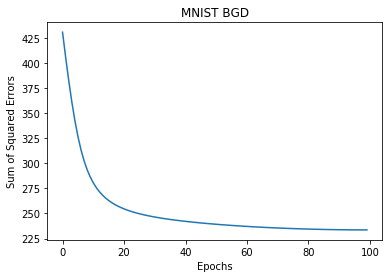

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt 

plt.plot(range(len(nn.cost_)), nn.cost_)
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Errors')
plt.title('MNIST BGD')
plt.show()

In [ ]:
import joy
%matplotlib inline

(X, y), (Xtest, ytest) = joy.load_mnist()
print(Xtest.shape)
nn = MnistBGD_LS(784, 100, 10, eta = 0.1, epochs = 200)  
nn.fit(X, y)       
self_accuracy = nn.evaluate(X, y)  
test_accuracy = nn.evaluate(Xtest, ytest)      
print('epoch:{}, Accuracy self:{}, test:{}%'.
      format(epoch, np.round(self_accuracy, 2), test_accuracy))

In [ ]:
(X, y), (Xtest, ytest) = joy.load_mnist()
nn = MnistBGD(784, 100, 10, eta = 0.1, epochs = 1000)
nn.fit(X, y)
accuracy = nn.evaluate(Xtest, ytest)

----------
_For God so loved the world that he gave his one and only Son, that whoever believes in him shall not perish but have eternal life. John3:16_